In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA

In [3]:
def subfolders(directory):
    return [ f.path for f in os.scandir(directory) if f.is_dir() and "analysis" not in f.path]

def files(directory):
    return [ f.path for f in os.scandir(directory) if f.is_file() ]

In [4]:
def smooth(arr, slide = 6):
    smoothed = pd.Series(arr).rolling(window=slide).mean().values
    return np.concatenate([ arr[:slide], smoothed[slide:] ])


def set_limits_card(axs, override_top):
    axs.set_ylim(top=override_top if override_top else 100)  # adjust the top leaving bottom unchanged
    axs.set_ylim(bottom=0) 

def set_limits_mean(axs, override_top):
    axs.set_ylim(top=override_top if override_top else 8)  # adjust the top leaving bottom unchanged
    axs.set_ylim(bottom=0) 

def set_limits_std(axs, override_top):
    axs.set_ylim(top=override_top if override_top else 8)  # adjust the top leaving bottom unchanged
    axs.set_ylim(bottom=0) 


def plot_one_row_of_dataset(axs, df, title, normalize_to_first = False, normalizator = None):
    axs.plot(smooth(df[:, 0]), c='r', label="1st")

    axs.set_title(title)
    axs.legend(loc='best', borderaxespad=0.)

def plot_two_rows_of_dataset(axs, df, title, normalize_to_first = False, normalizator = None):
    if normalize_to_first:
        if normalizator == '/':
            axs.plot(smooth(df[:, 0] / df[:, 1]), c='g', label="2nd")
        elif normalizator == '-':
            axs.plot(smooth(df[:, 0] - df[:, 1]), c='g', label="2nd")
    else:
        axs.plot(smooth(df[:, 0]), c='g', label="2nd")
        axs.plot(smooth(df[:, 1]), c='r', label="1st")

    axs.set_title(title)
    axs.legend(loc='best', borderaxespad=0.)

def plot_three_rows_of_dataset(axs, df, title, normalize_to_first = False, normalizator = None):
    if normalize_to_first:
        if normalizator == '/':
            axs.plot(smooth(df[:, 0] / df[:, 2]), c='y', label="3rd")
            axs.plot(smooth(df[:, 1] / df[:, 2]), c='g', label="2nd")
        elif normalizator == '-':
            axs.plot(smooth(df[:, 0] - df[:, 2]), c='y', label="3rd")
            axs.plot(smooth(df[:, 1] - df[:, 2]), c='g', label="2nd")
    else:
        axs.plot(smooth(df[:, 0]), c='y', label="3rd")
        axs.plot(smooth(df[:, 1]), c='g', label="2nd")
        axs.plot(smooth(df[:, 2]), c='r', label="1st")

    axs.set_title(title)
    axs.legend(loc='best', borderaxespad=0.)

def plot_four_rows_of_dataset(axs, df, title, normalize_to_first = False, normalizator = None):
    if normalize_to_first:
        if normalizator == '/':
            axs.plot(smooth(df[:, 0] / df[:, 3]), c='m', label="4th")
            axs.plot(smooth(df[:, 1] / df[:, 3]), c='y', label="3rd")
            axs.plot(smooth(df[:, 2] / df[:, 3]), c='g', label="2nd")
        elif normalizator == '-':
            axs.plot(smooth(df[:, 0] - df[:, 3]), c='m', label="4th")
            axs.plot(smooth(df[:, 1] - df[:, 3]), c='y', label="3th")
            axs.plot(smooth(df[:, 2] - df[:, 3]), c='g', label="2nd")
    else:
        axs.plot(smooth(df[:, 0]), label="4th")
        axs.plot(smooth(df[:, 1]), c='y', label="3rd")
        axs.plot(smooth(df[:, 2]), c='g', label="2nd")
        axs.plot(smooth(df[:, 3]), c='r', label="1st")

    axs.set_title(title)
    axs.legend(loc='best', borderaxespad=0.)

def plot_five_rows_of_dataset(axs, df, title, normalize_to_first = False, normalizator = None):
    if normalize_to_first:
        if normalizator == '/':
            axs.plot(smooth(df[:, 0] / df[:, 4]), c='k', label="5th")
            axs.plot(smooth(df[:, 1] / df[:, 4]), c='m', label="4th")
            axs.plot(smooth(df[:, 2] / df[:, 4]), c='y', label="3rd")
            axs.plot(smooth(df[:, 3] / df[:, 4]), c='g', label="2nd")
        elif normalizator == '-':
            axs.plot(smooth(df[:, 0] - df[:, 4]), c='k', label="5th")
            axs.plot(smooth(df[:, 1] - df[:, 4]), c='m', label="4th")
            axs.plot(smooth(df[:, 2] - df[:, 4]), c='y', label="3rd")
            axs.plot(smooth(df[:, 3] - df[:, 4]), c='g', label="2nd")
    else:
        axs.plot(smooth(df[:, 0]), c='k', label="5th")
        axs.plot(smooth(df[:, 1]), c='m', label="4th")
        axs.plot(smooth(df[:, 2]), c='y', label="3rd")
        axs.plot(smooth(df[:, 3]), c='g', label="2nd")
        axs.plot(smooth(df[:, 4]), c='r', label="1st")
        
    axs.set_title(title)
    axs.legend(loc='best', borderaxespad=0.)

In [5]:
def extract_data_about_experiments(n_clusters = 1):
    data = {}

    for experiment_folder in subfolders(".."):
        data[os.path.basename(experiment_folder)] = {}

        for file in files(os.path.join(experiment_folder, "statistics", f"clusters={n_clusters}")):
            num = int(os.path.basename(file))

            f = open(file, 'rb')
            dump = pickle.load(f)
            data[os.path.basename(experiment_folder)][num] = dump
            f.close()
    
    return data
    
    
def filter_where_contains_values(directory_names, needed_substrings):
    ret = []
    
    for directory_name in directory_names:
        if len(needed_substrings)==0 or all([needed_substring in directory_name for needed_substring in needed_substrings]):
            ret.append(directory_name)
            
    return ret

# Number of clusters

In [20]:
number_of_clusters = 5

if number_of_clusters == 1:
    plotting_function = plot_one_row_of_dataset

if number_of_clusters == 2:
    plotting_function = plot_two_rows_of_dataset

if number_of_clusters == 3:
    plotting_function = plot_three_rows_of_dataset

if number_of_clusters == 4:
    plotting_function = plot_four_rows_of_dataset

if number_of_clusters == 5:
    plotting_function = plot_five_rows_of_dataset

In [21]:
data = extract_data_about_experiments(number_of_clusters)
experiments = list(data.keys())

In [22]:
def get_card_mean_std(list_of_experiments):
    data_fragment = [data[experiment] for experiment in list_of_experiments]

    n = 100
    k = number_of_clusters
    
    card_arr = np.zeros((n, k))
    mean_arr = np.zeros((n, k))
    std_arr = np.zeros((n, k))


    for experiment in data_fragment:
        iterations = sorted(experiment.keys())
        
        for i, iteration in enumerate(iterations):
            iteration_data = experiment[iteration]
            
            card = iteration_data["cardinality_of_clusters"]
            mean = iteration_data["cluster_centers"]
            std = iteration_data["std_in_clusters"]
            
            card = np.array(list(iteration_data["cardinality_of_clusters"].values()))
            
            mean = np.apply_along_axis(lambda x: LA.norm(x), 1, mean)

            std = np.array(list(std.values()))
            std = np.apply_along_axis(lambda x: LA.norm(x), 1, std)

            sorted_ind = np.argsort(card)

            card_arr[i, :] += card[sorted_ind]
            mean_arr[i, :] += mean[sorted_ind]
            std_arr[i, :] += std[sorted_ind]

    card_arr /= len(list_of_experiments)
    mean_arr /= len(list_of_experiments)
    std_arr /= len(list_of_experiments) 
        
    return card_arr, mean_arr, std_arr

In [23]:
def plot_for_four_experiments(exp1, exp2, exp3, exp4, title1, title2, title3, title4, comparison_title, additional_plotting_arguments):
    c1, m1, s1 = get_card_mean_std(exp1)
    c2, m2, s2 = get_card_mean_std(exp2)    
    c3, m3, s3 = get_card_mean_std(exp3)    
    c4, m4, s4 = get_card_mean_std(exp4)    
    
    fig, axs = plt.subplots(2, 2)
    set_limits_card(axs[0, 0], additional_plotting_arguments.get("card_lim"))
    set_limits_card(axs[0, 1], additional_plotting_arguments.get("card_lim"))
    set_limits_card(axs[1, 0], additional_plotting_arguments.get("card_lim"))
    set_limits_card(axs[1, 1], additional_plotting_arguments.get("card_lim"))
    plotting_function(axs[0, 0], c1, title1)
    plotting_function(axs[0, 1], c2, title2)
    plotting_function(axs[1, 0], c3, title3)
    plotting_function(axs[1, 1], c4, title4)
    plt.savefig(f"{comparison_title}_cardinality.png")
    
    
    fig, axs = plt.subplots(2, 2)
    set_limits_mean(axs[0, 0], additional_plotting_arguments.get("mean_lim"))
    set_limits_mean(axs[0, 1], additional_plotting_arguments.get("mean_lim"))
    set_limits_mean(axs[1, 0], additional_plotting_arguments.get("mean_lim"))
    set_limits_mean(axs[1, 1], additional_plotting_arguments.get("mean_lim"))
    plotting_function(axs[0, 0], m1, title1)
    plotting_function(axs[0, 1], m2, title2)
    plotting_function(axs[1, 0], m3, title3)
    plotting_function(axs[1, 1], m4, title4)
    plt.savefig(f"{comparison_title}_mean.png")
    
    
    fig, axs = plt.subplots(2, 2)
    set_limits_std(axs[0, 0], additional_plotting_arguments.get("std_lim"))
    set_limits_std(axs[0, 1], additional_plotting_arguments.get("std_lim"))
    set_limits_std(axs[1, 0], additional_plotting_arguments.get("std_lim"))
    set_limits_std(axs[1, 1], additional_plotting_arguments.get("std_lim"))
    plotting_function(axs[0, 0], s1, title1)
    plotting_function(axs[0, 1], s2, title2)
    plotting_function(axs[1, 0], s3, title3)
    plotting_function(axs[1, 1], s4, title4)
    plt.savefig(f"{comparison_title}_std.png")

In [24]:
import matplotlib
matplotlib.rc('figure', figsize=(20, 10))

In [25]:
comparisons = {}

#"all_fun_1d"
tmp = filter_where_contains_values(experiments, ["dim_1", "tournament_2"])
gaussian = filter_where_contains_values(tmp, ["gaussian_"])
two_gaussians = filter_where_contains_values(tmp, ["two_gaussians"])
constant = filter_where_contains_values(tmp, ["constant"])
rastrigin = filter_where_contains_values(tmp, ["rastrigin"])
comparisons["all_fun_1d"] = [gaussian, two_gaussians, constant, rastrigin, \
                             "gaussian", "two_gaussians", "constant", "rastrigin", {"std_lim": 3}]


#"all_fun_2d"
tmp = filter_where_contains_values(experiments, ["dim_2", "tournament_2"])
gaussian = filter_where_contains_values(tmp, ["gaussian_"])
two_gaussians = filter_where_contains_values(tmp, ["two_gaussians"])
constant = filter_where_contains_values(tmp, ["constant"])
rastrigin = filter_where_contains_values(tmp, ["rastrigin"])
comparisons["all_fun_2d"] = [gaussian, two_gaussians, constant, rastrigin, \
                             "gaussian", "two_gaussians", "constant", "rastrigin", {"std_lim": 4}]


#"tournament_gauss"
tmp = filter_where_contains_values(experiments, ["gaussian_", "dim_1"])
tour_2 = filter_where_contains_values(tmp, ["tournament_2"])
tour_4 = filter_where_contains_values(tmp, ["tournament_4"])
tour_8 = filter_where_contains_values(tmp, ["tournament_8"])
tour_16 = filter_where_contains_values(tmp, ["tournament_16"])
comparisons["tournament_gauss"] = [tour_2, tour_4, tour_8, tour_16, \
                                   "tournament_2", "tournament_4", "tournament_8", "tournament_16", {"mean_lim": 3, "std_lim": 3}]


#"tournament_two_gauss"
tmp = filter_where_contains_values(experiments, ["two_gaussians", "dim_1"])
tour_2 = filter_where_contains_values(tmp, ["tournament_2"])
tour_4 = filter_where_contains_values(tmp, ["tournament_4"])
tour_8 = filter_where_contains_values(tmp, ["tournament_8"])
tour_16 = filter_where_contains_values(tmp, ["tournament_16"])
comparisons["tournament_two_gauss"] = [tour_2, tour_4, tour_8, tour_16, \
                                       "tournament_2", "tournament_4", "tournament_8", "tournament_16", {"mean_lim": 3, "std_lim": 3}]


#"tournament_constant"
tmp = filter_where_contains_values(experiments, ["constant", "dim_1"])
tour_2 = filter_where_contains_values(tmp, ["tournament_2"])
tour_4 = filter_where_contains_values(tmp, ["tournament_4"])
tour_8 = filter_where_contains_values(tmp, ["tournament_8"])
tour_16 = filter_where_contains_values(tmp, ["tournament_16"])
comparisons["tournament_constant"] = [tour_2, tour_4, tour_8, tour_16, \
                                      "tournament_2", "tournament_4", "tournament_8", "tournament_16", {}]


#"tournament_rastrigin"
tmp = filter_where_contains_values(experiments, ["rastrigin", "dim_1"])
tour_2 = filter_where_contains_values(tmp, ["tournament_2"])
tour_4 = filter_where_contains_values(tmp, ["tournament_4"])
tour_8 = filter_where_contains_values(tmp, ["tournament_8"])
tour_16 = filter_where_contains_values(tmp, ["tournament_16"])
print(len(tour_2), len(tour_4), len(tour_8), len(tour_16))
comparisons["tournament_rastrigin"] = [tour_2, tour_4, tour_8, tour_16, \
                                       "tournament_2", "tournament_4", "tournament_8", "tournament_16", {"std_lim": 3}]

                                       
#"dimension_gauss"
tmp = filter_where_contains_values(experiments, ["gaussian_", "tournament_2"])
dim_1 = filter_where_contains_values(tmp, ["dim_1"])
dim_2 = filter_where_contains_values(tmp, ["dim_2"])
dim_3 = filter_where_contains_values(tmp, ["dim_3"])
dim_5 = filter_where_contains_values(tmp, ["dim_5"])
comparisons["dimension_gauss"] = [dim_1, dim_2, dim_3, dim_5, \
                                  "dim_1", "dim_2", "dim_3", "dim_5", {"mean_lim": 5}]


#"dimension_two_gauss"
tmp = filter_where_contains_values(experiments, ["two_gaussians", "tournament_2"])
dim_1 = filter_where_contains_values(tmp, ["dim_1"])
dim_2 = filter_where_contains_values(tmp, ["dim_2"])
dim_3 = filter_where_contains_values(tmp, ["dim_3"])
dim_5 = filter_where_contains_values(tmp, ["dim_5"])                                     
comparisons["dimension_two_gauss"] = [dim_1, dim_2, dim_3, dim_5, \
                                      "dim_1", "dim_2", "dim_3", "dim_5", {"mean_lim": 5}]


#"dimension_constant"
tmp = filter_where_contains_values(experiments, ["constant", "tournament_2"])
dim_1 = filter_where_contains_values(tmp, ["dim_1"])
dim_2 = filter_where_contains_values(tmp, ["dim_2"])
dim_3 = filter_where_contains_values(tmp, ["dim_3"])
dim_5 = filter_where_contains_values(tmp, ["dim_5"])
comparisons["dimension_constant"] = [dim_1, dim_2, dim_3, dim_5,  \
                                     "dim_1", "dim_2", "dim_3", "dim_5", {}]


#"dimension_rastrigin"
tmp = filter_where_contains_values(experiments, ["rastrigin", "tournament_2"])
dim_1 = filter_where_contains_values(tmp, ["dim_1"])
dim_2 = filter_where_contains_values(tmp, ["dim_2"])
dim_3 = filter_where_contains_values(tmp, ["dim_3"])
dim_5 = filter_where_contains_values(tmp, ["dim_5"])
comparisons["dimension_rastrigin"] = [dim_1, dim_2, dim_3, dim_5, \
                                      "dim_1", "dim_2", "dim_3", "dim_5", {"mean_lim": 20, "std_lim": 3}]

3 3 3 3


c:\users\brodkap\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\brodkap\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
c:\users\brodkap\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

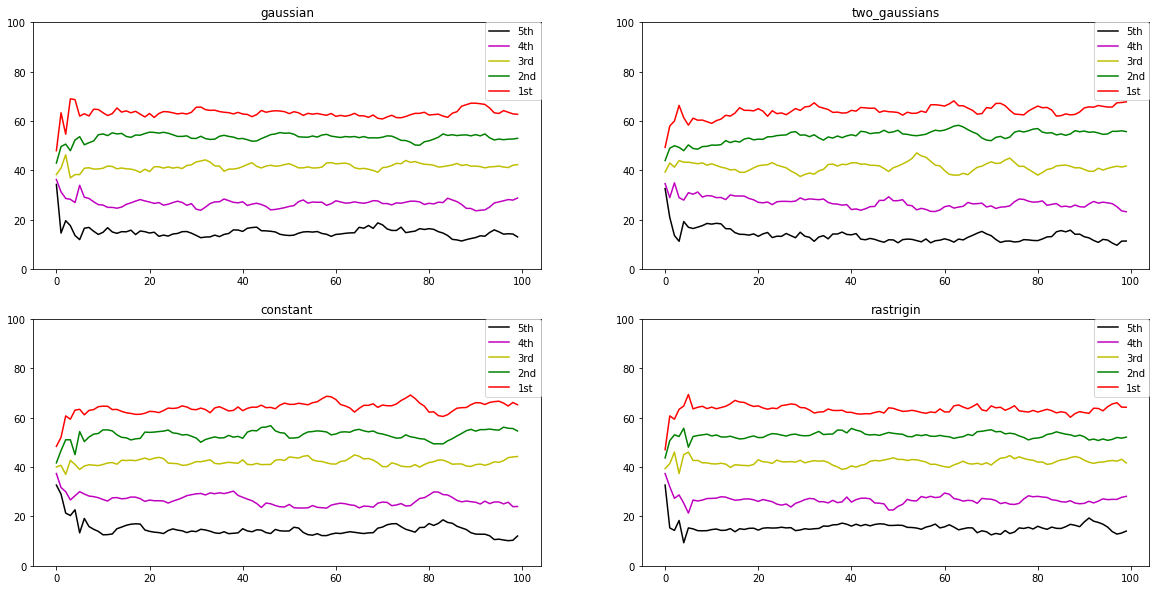

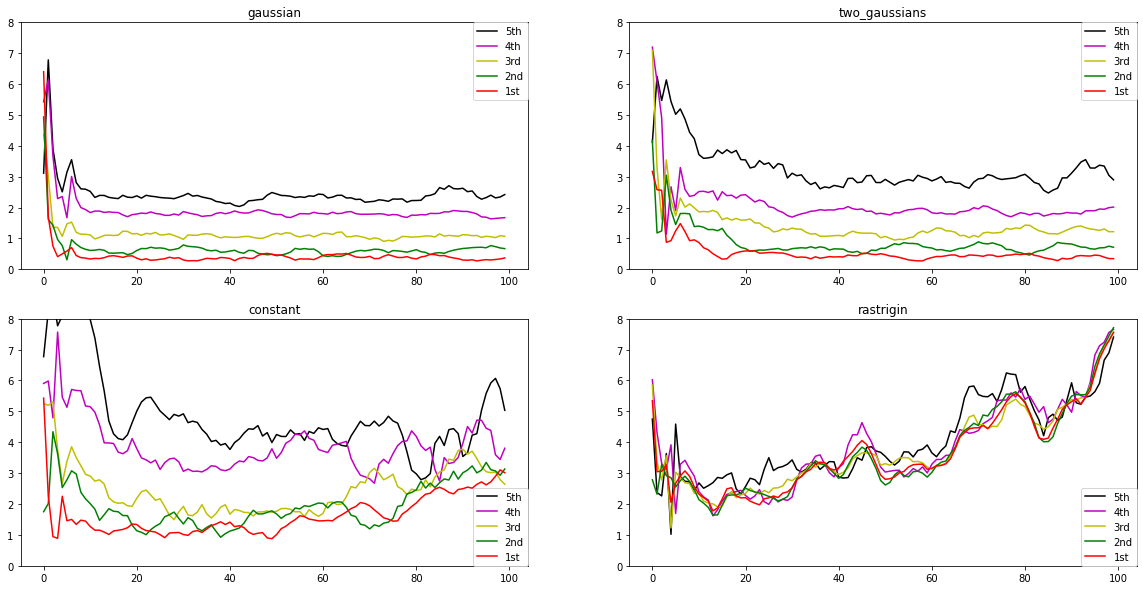

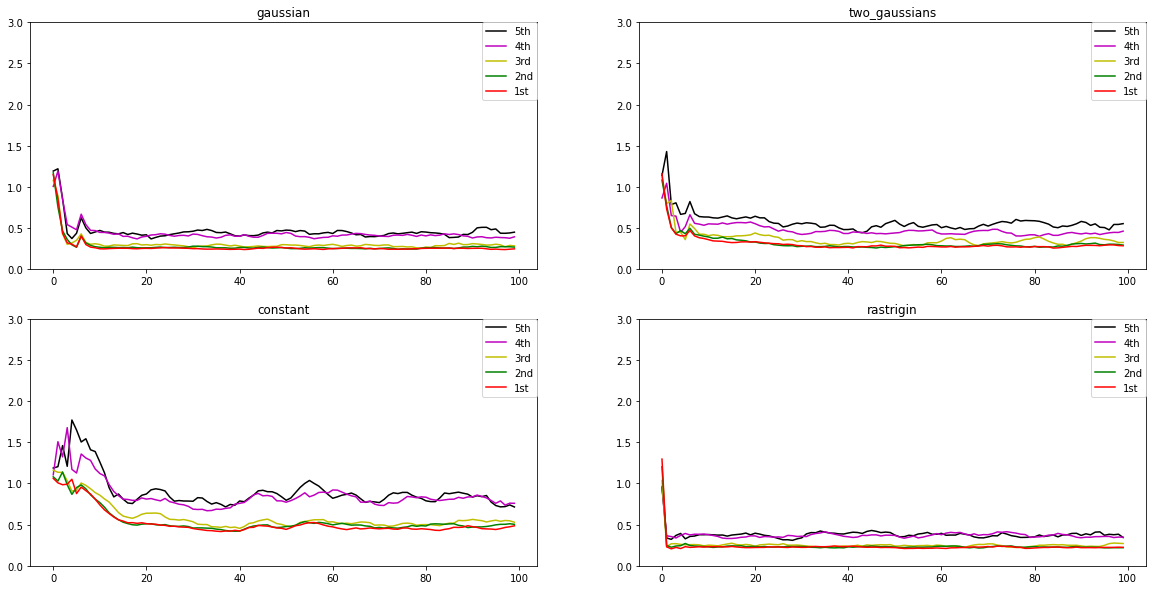

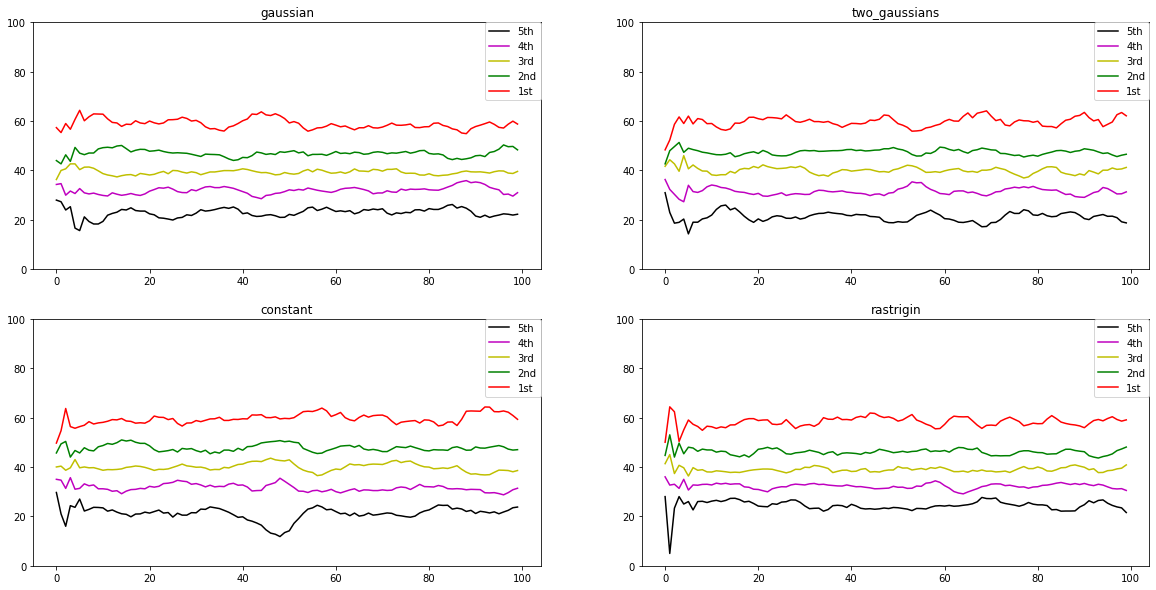

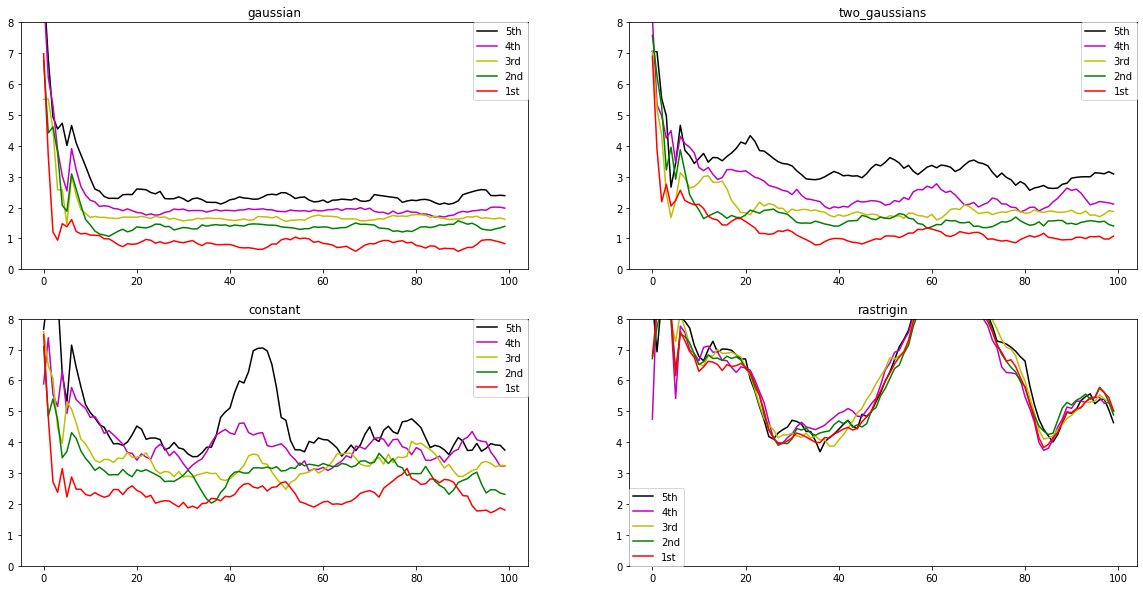

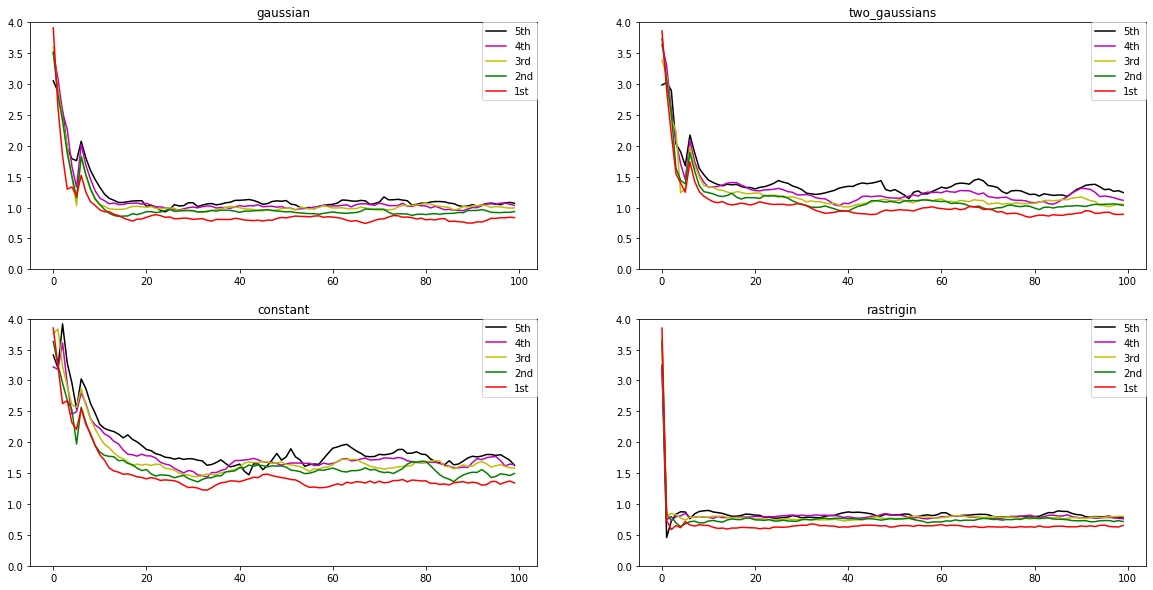

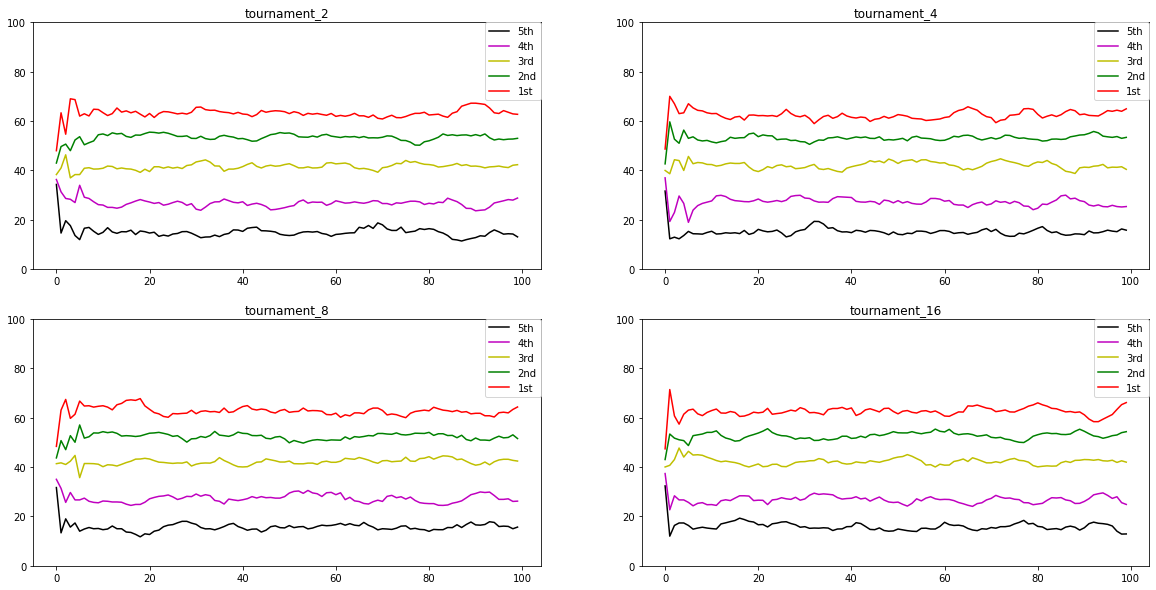

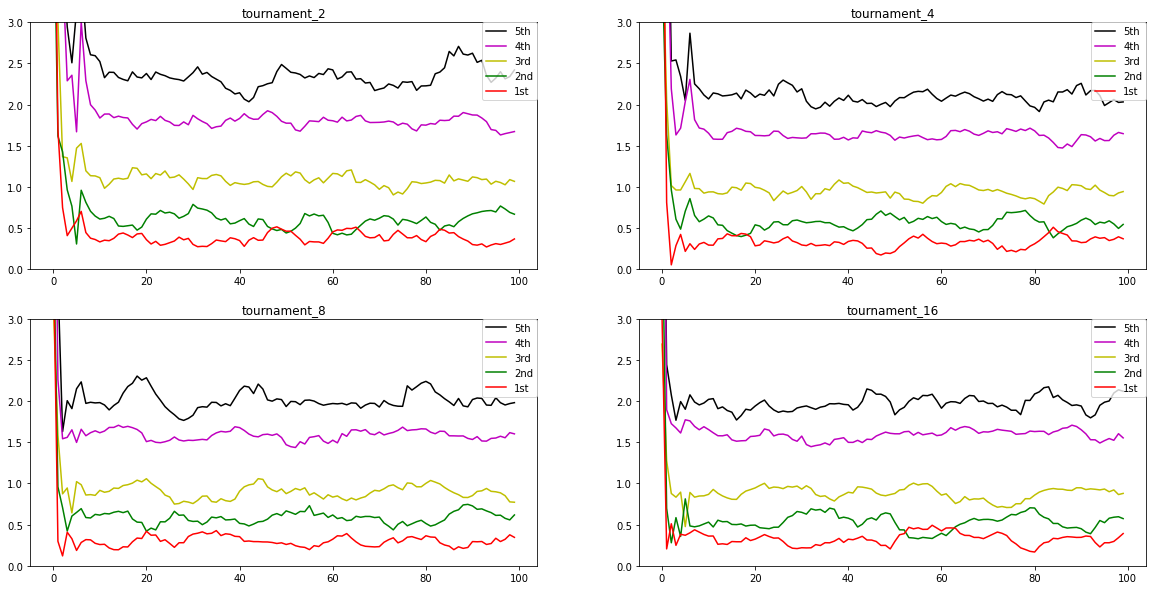

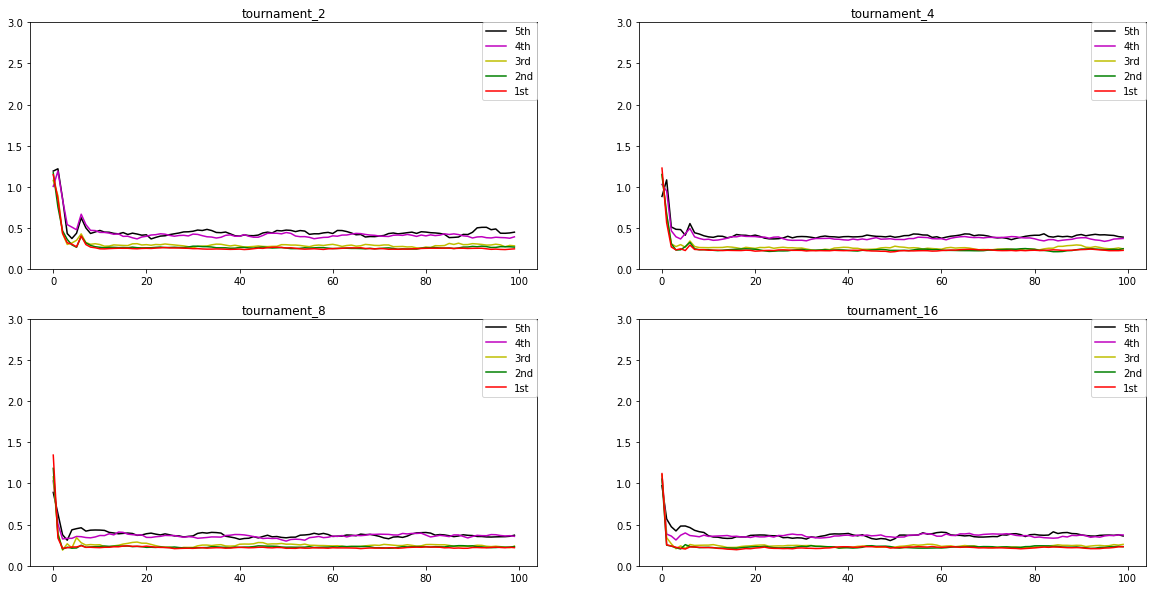

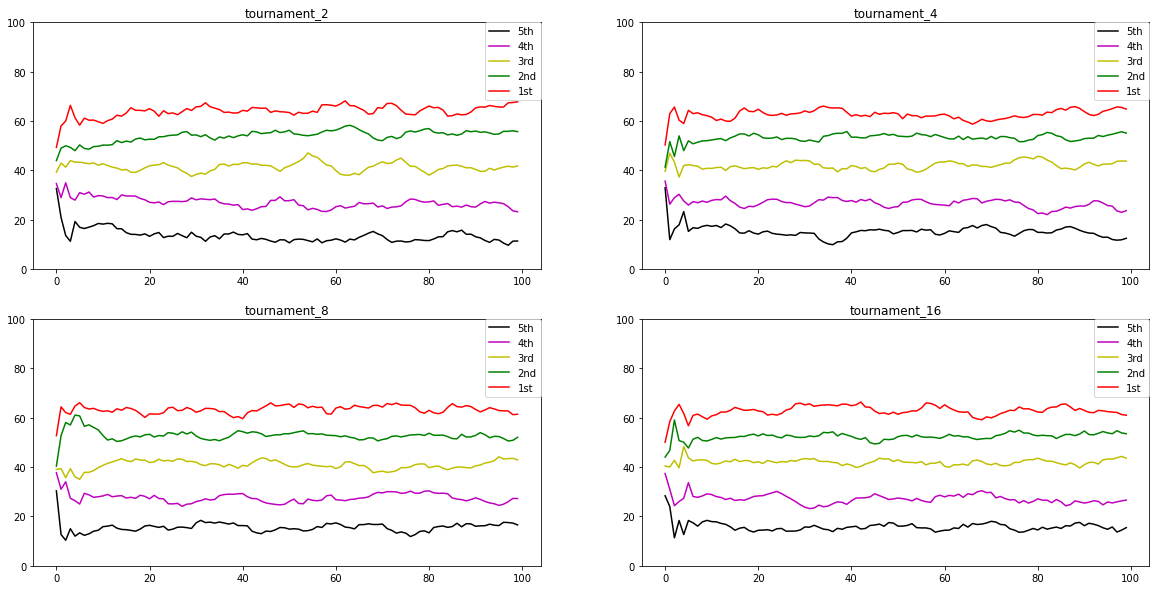

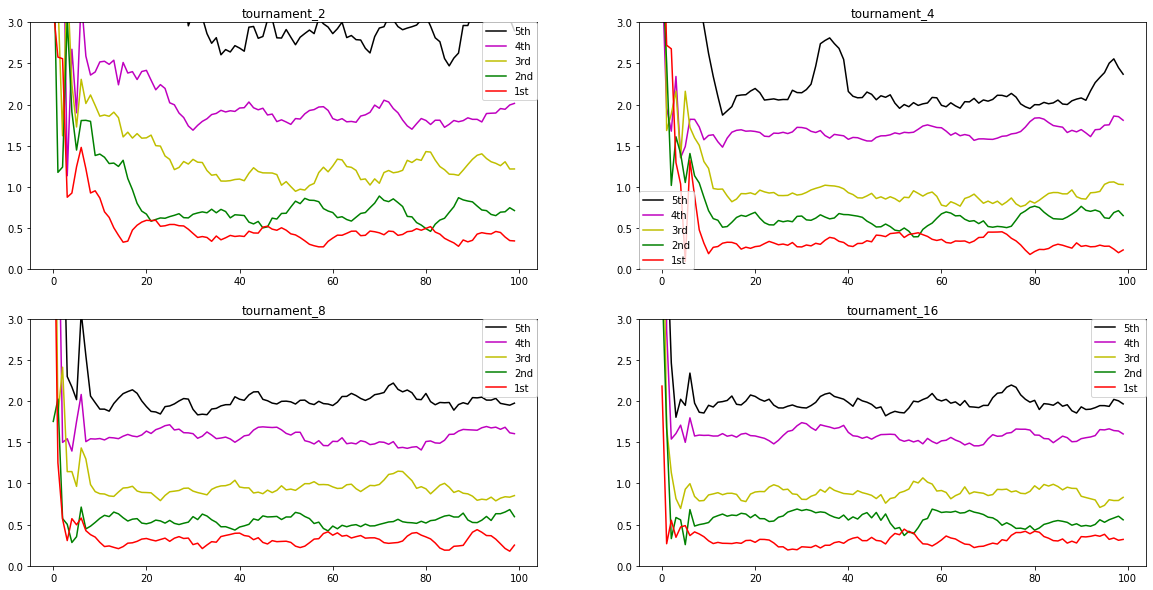

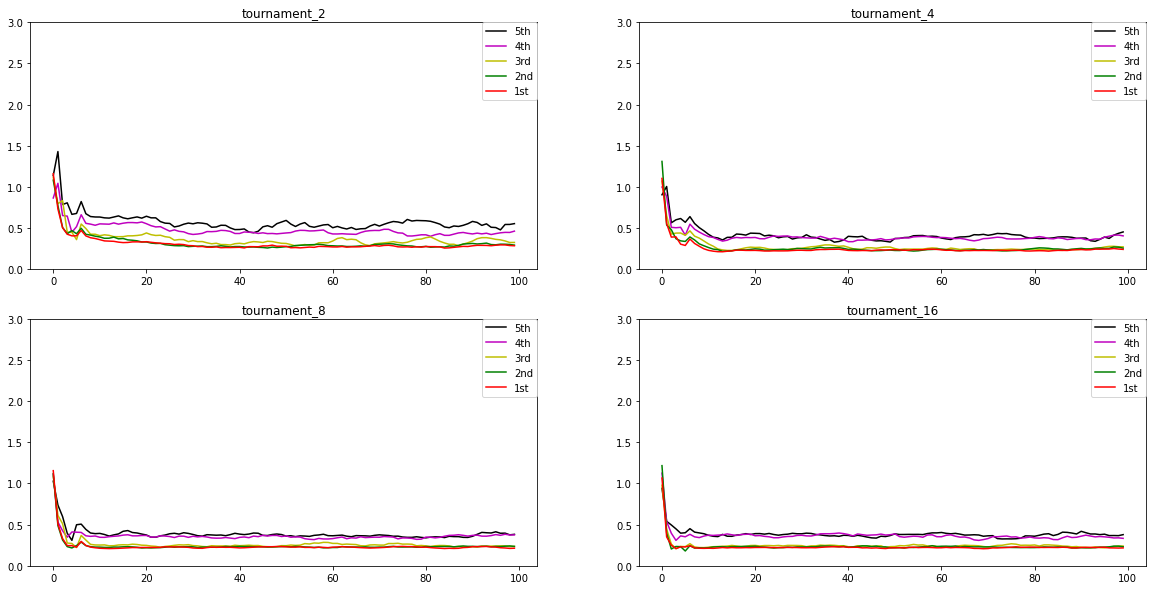

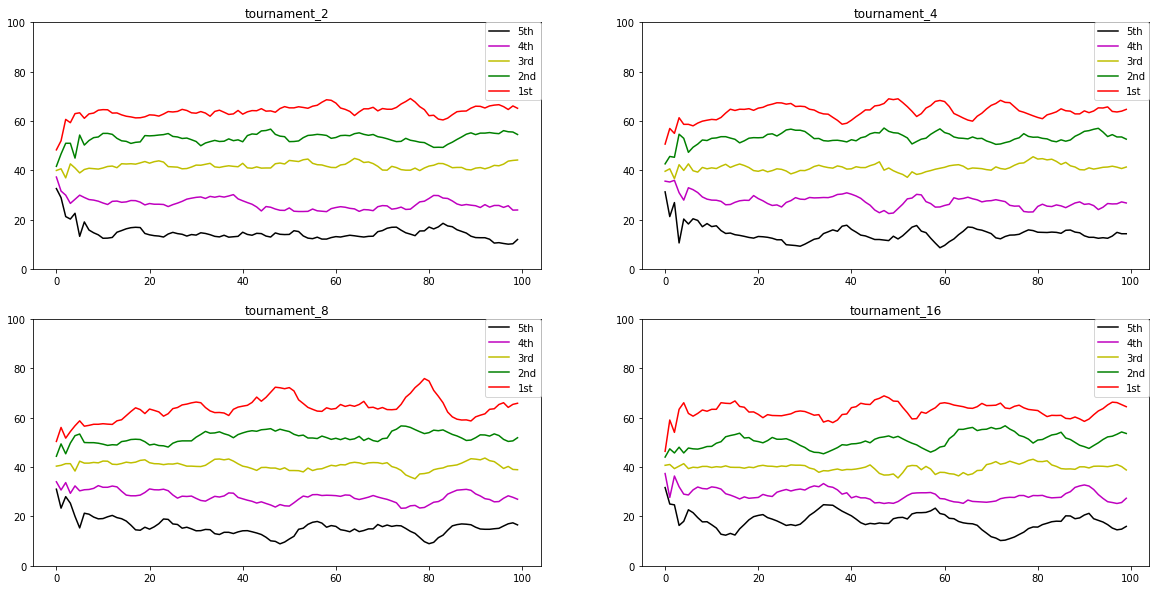

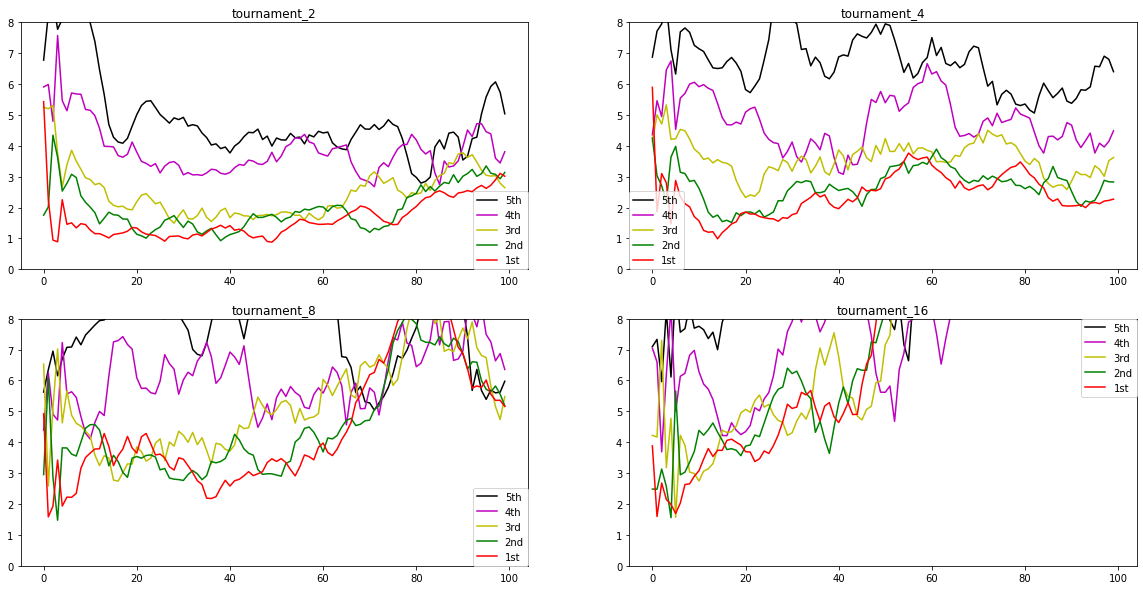

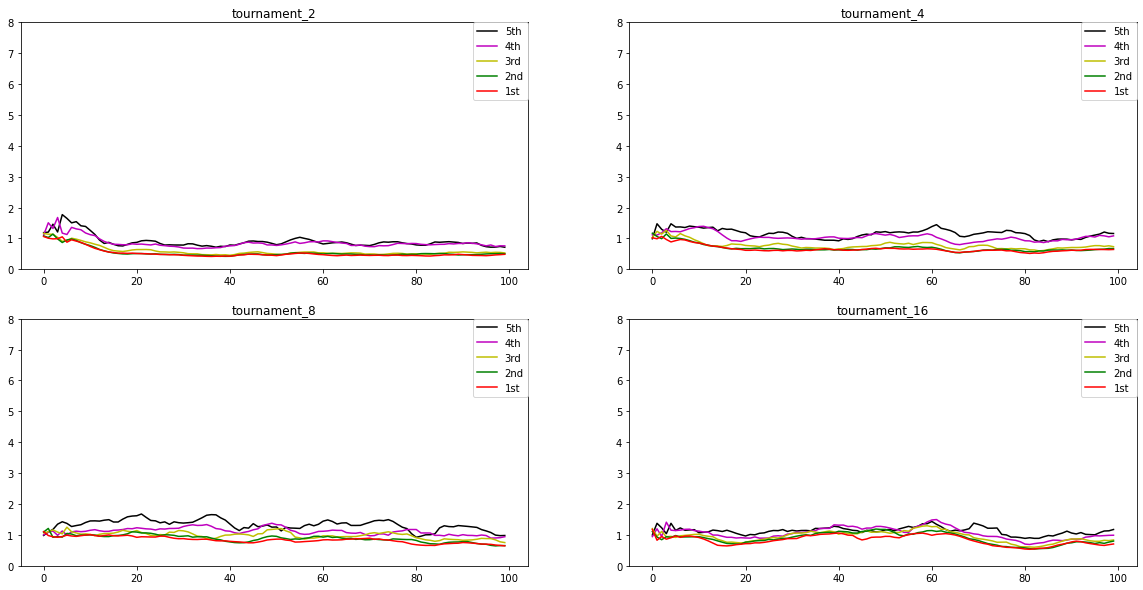

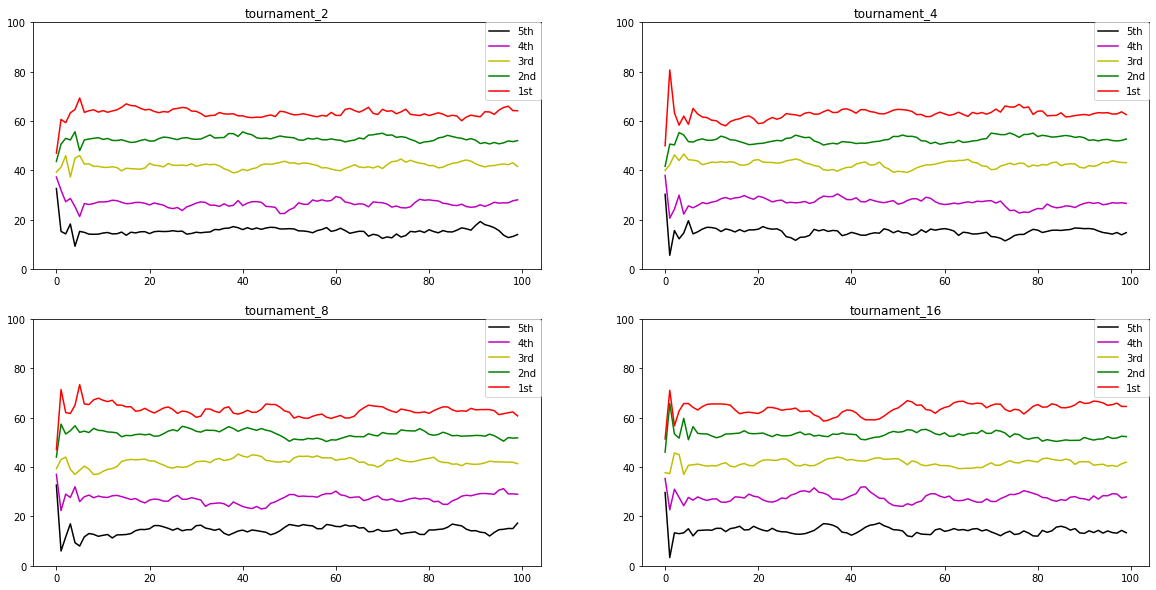

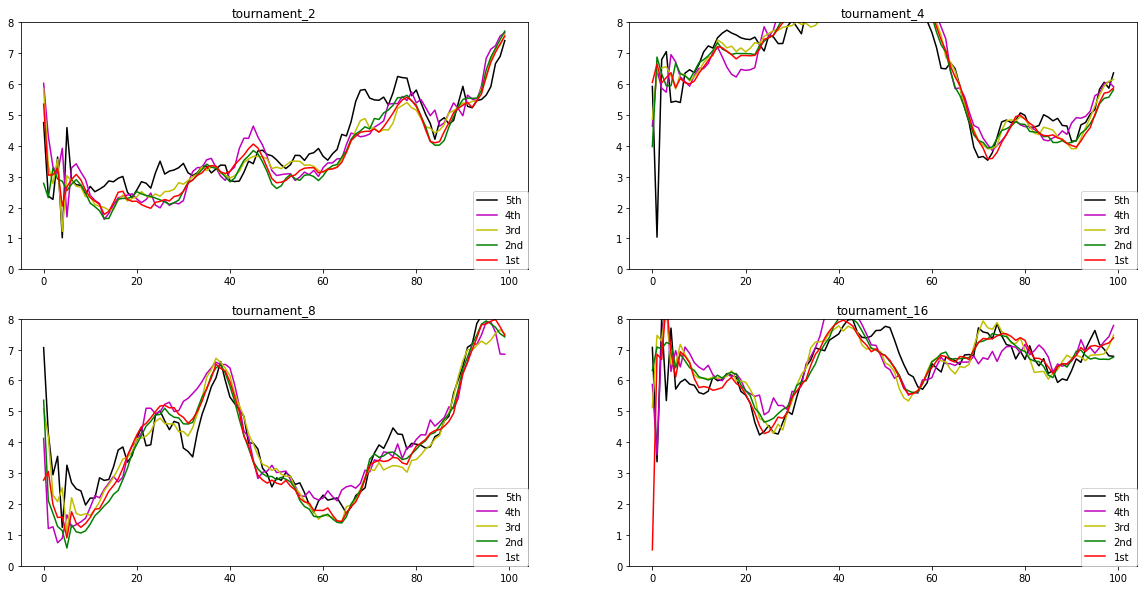

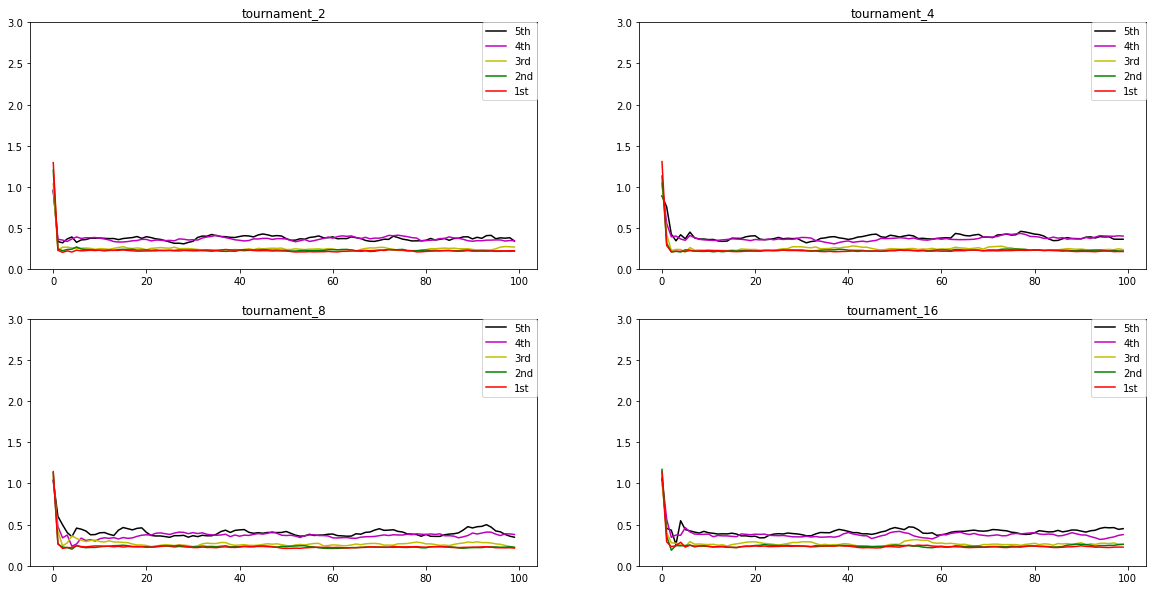

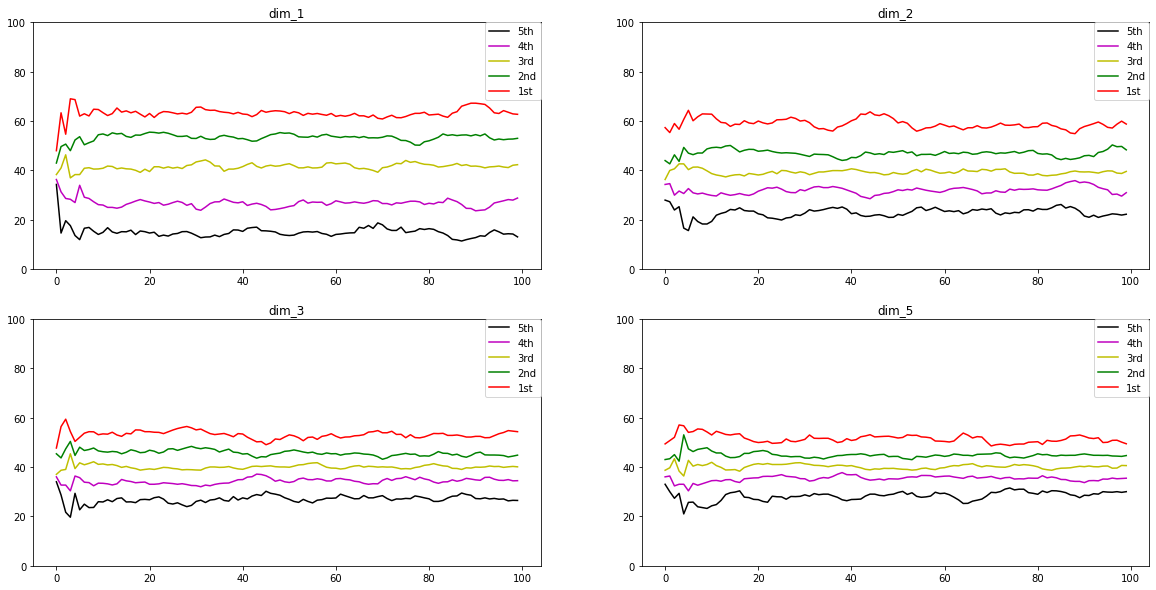

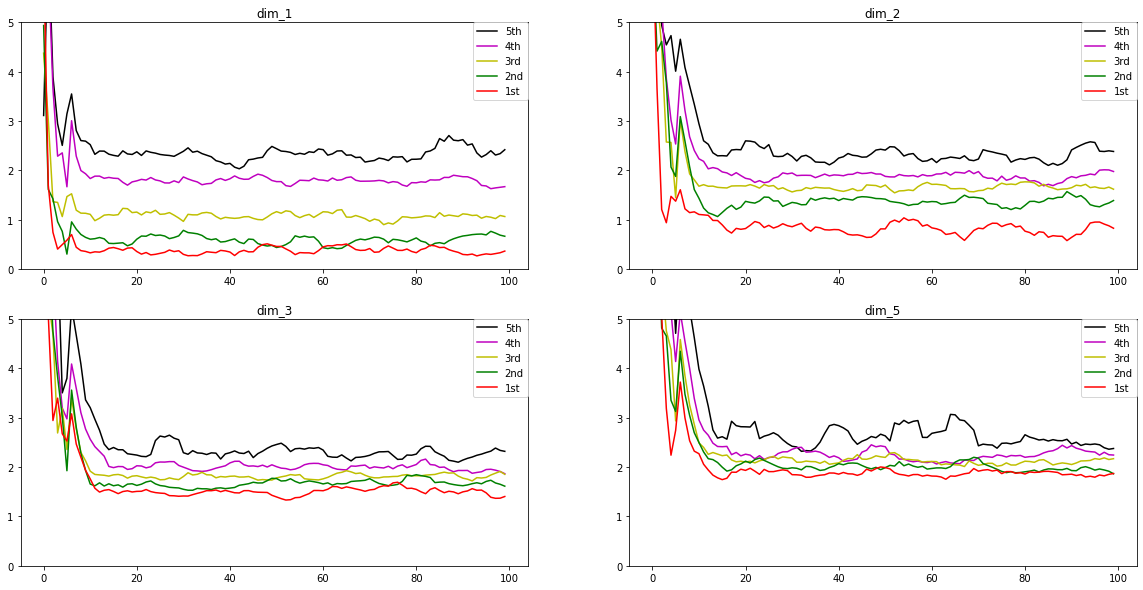

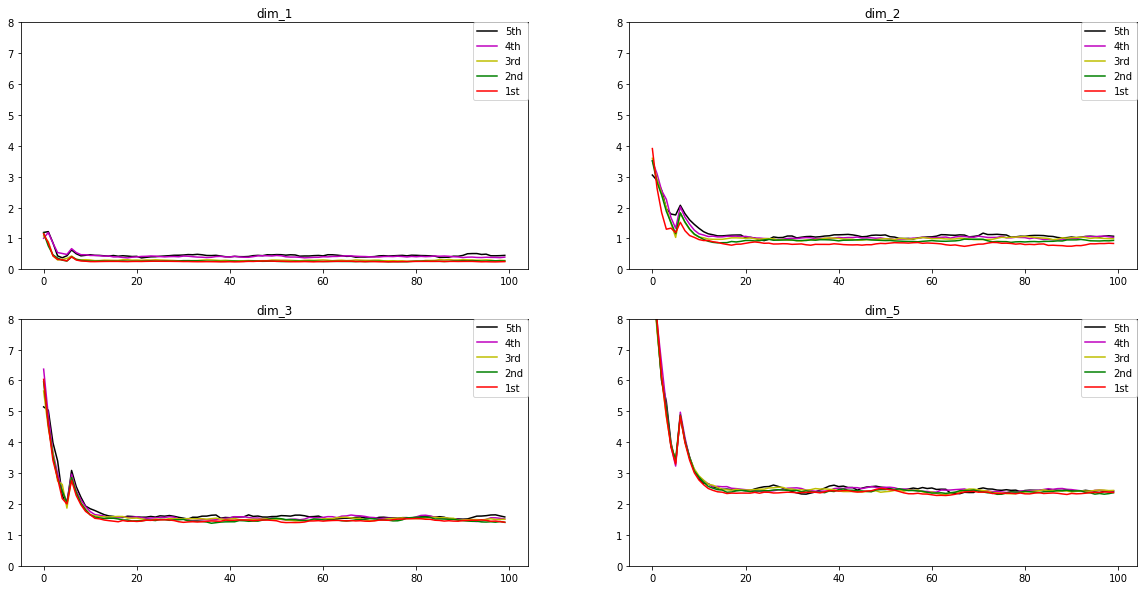

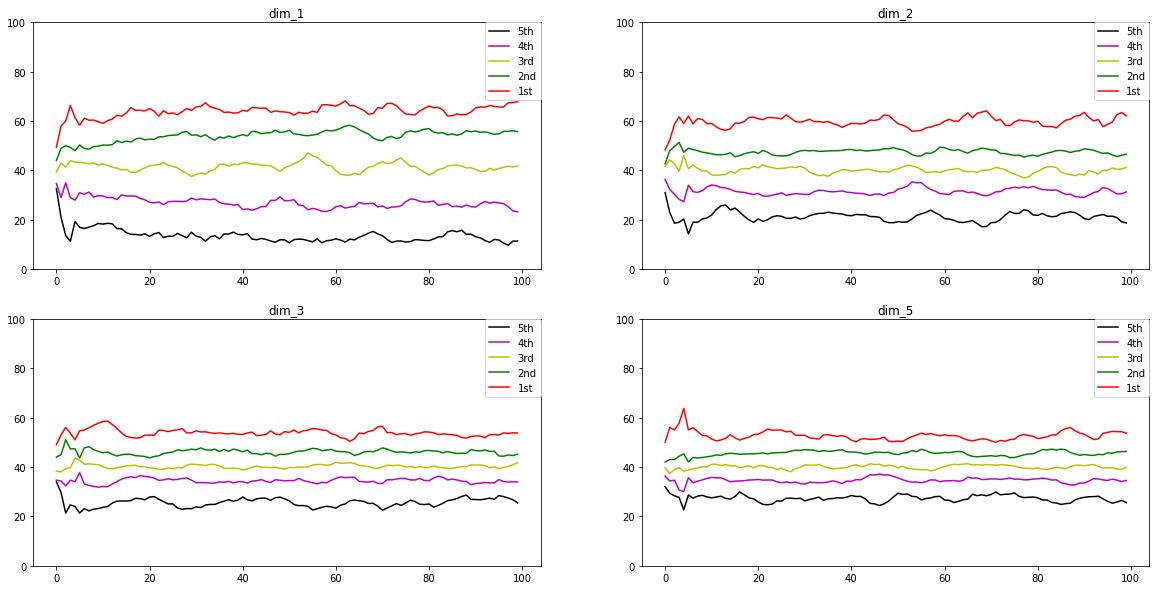

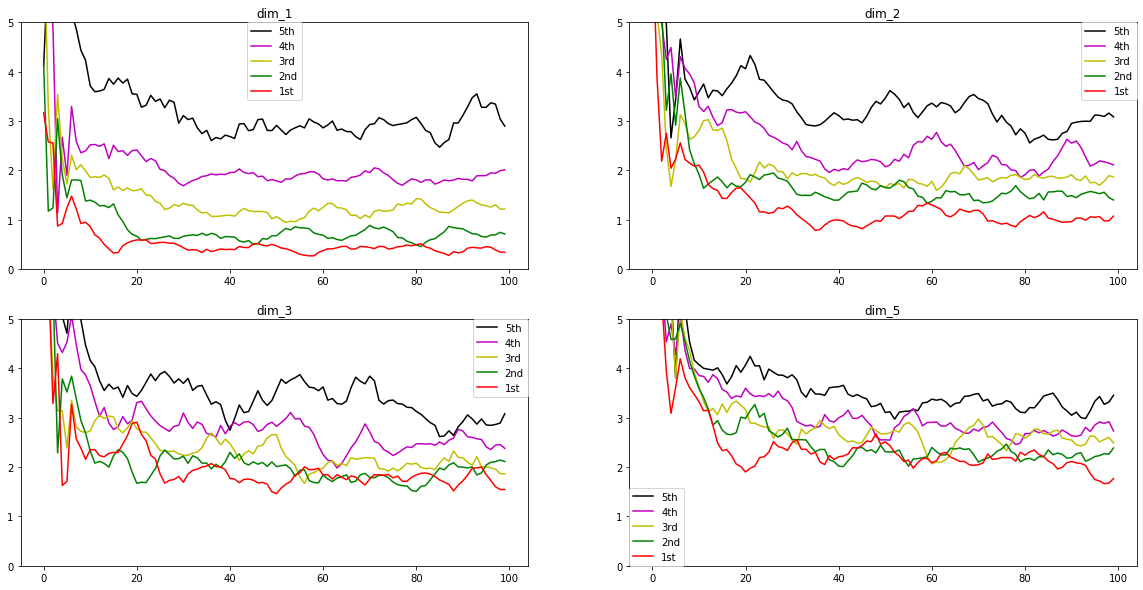

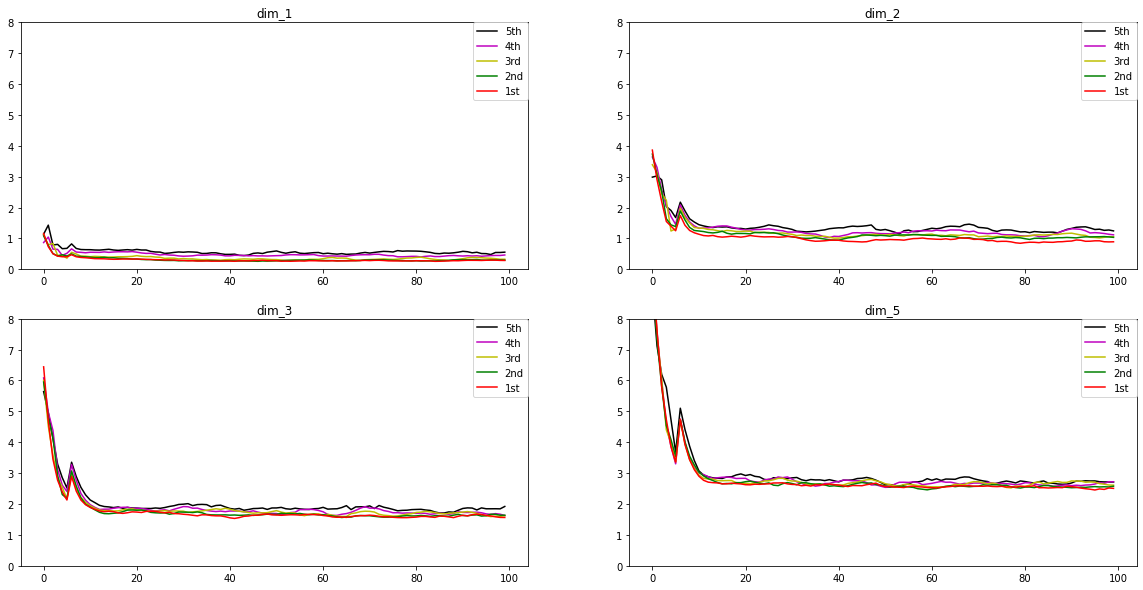

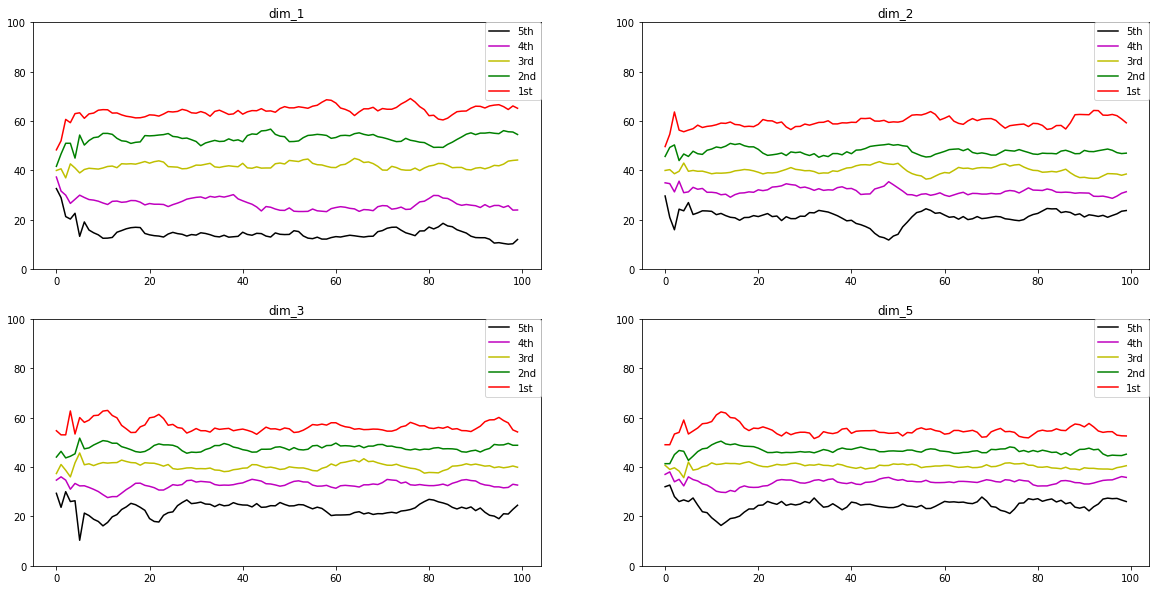

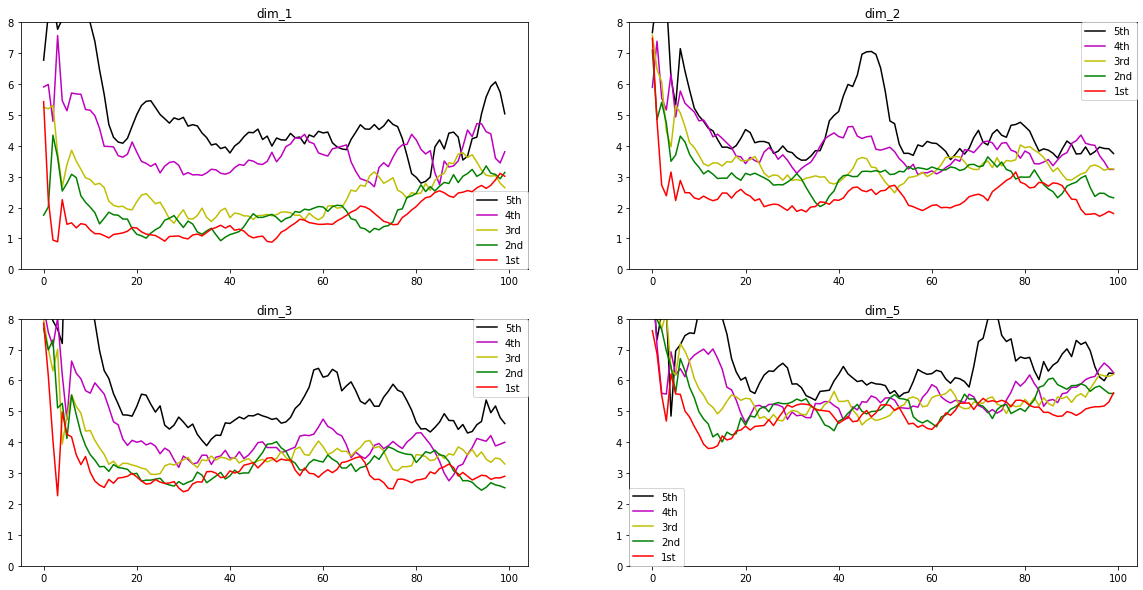

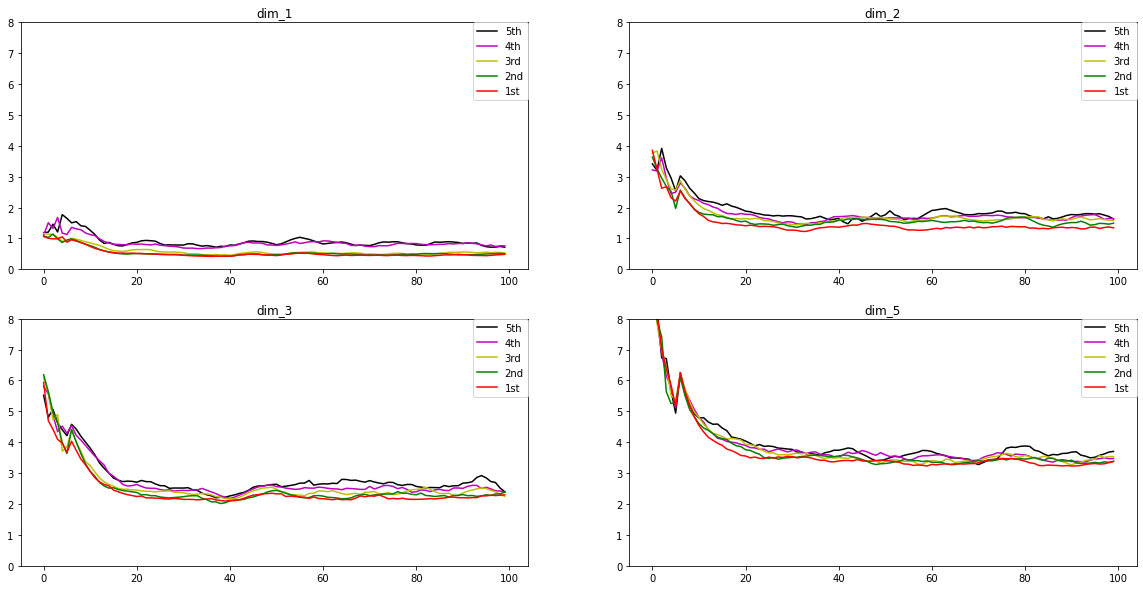

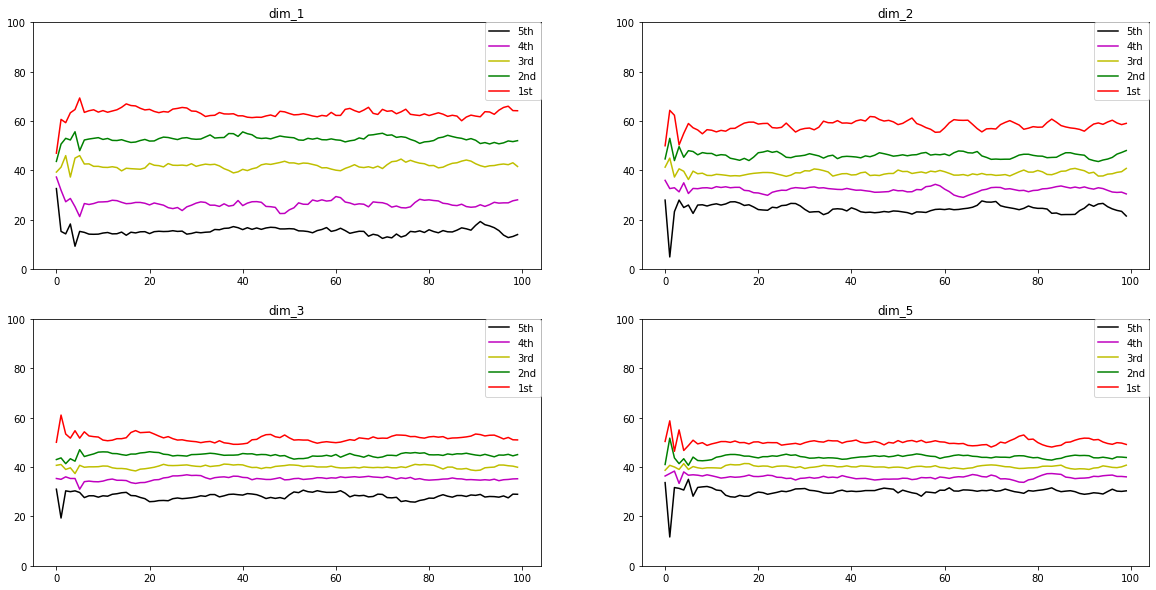

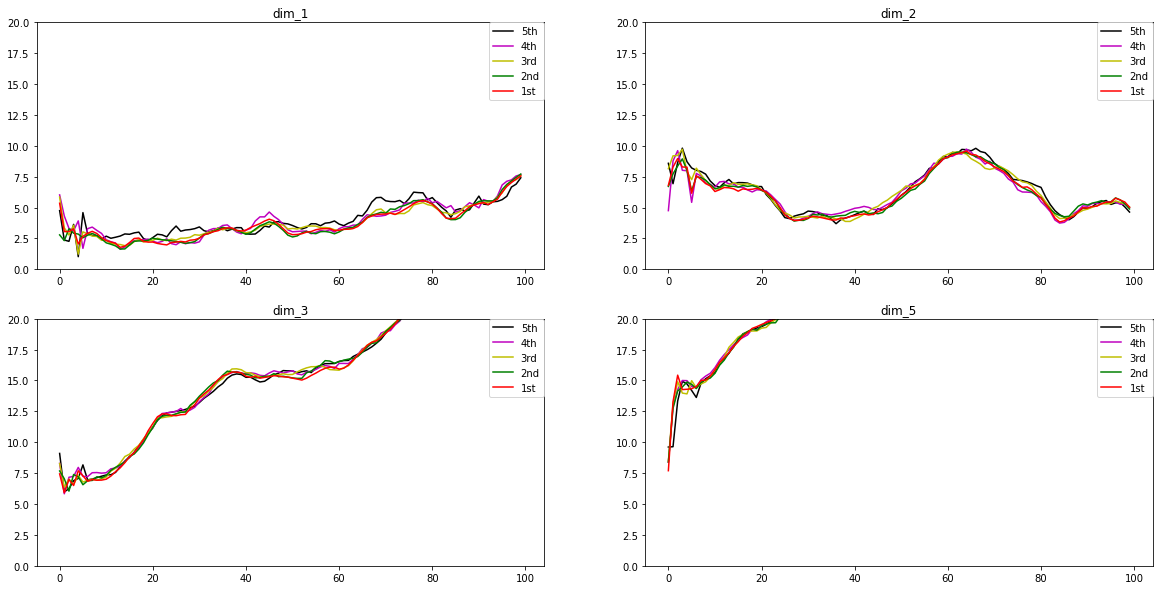

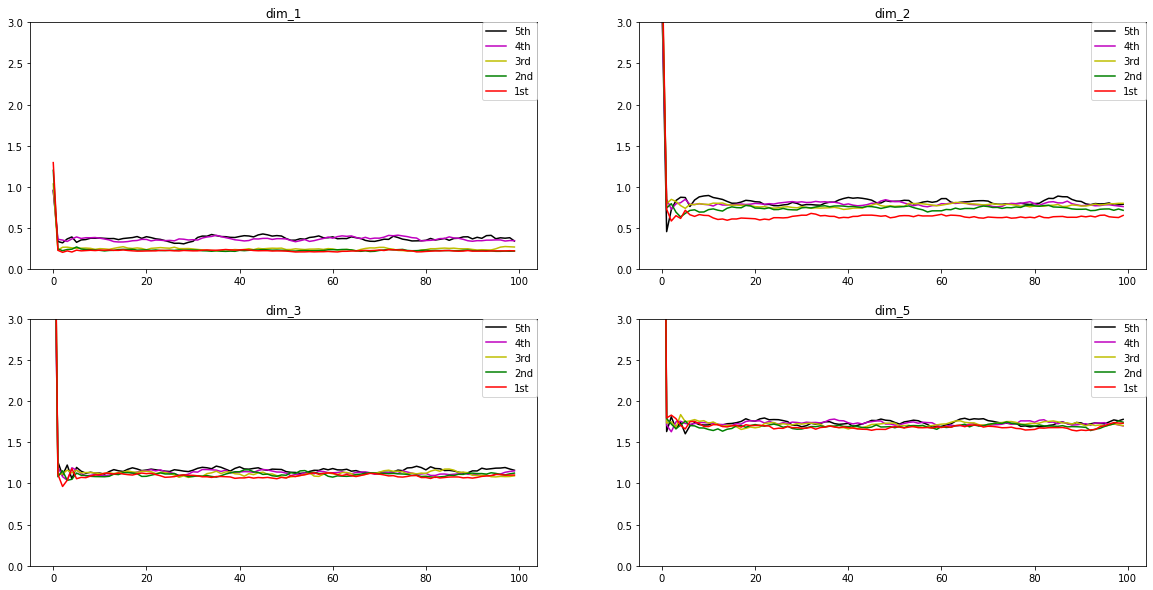

In [26]:
for k, v in comparisons.items():
    plot_for_four_experiments(v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7], k, v[8])